# ETL on books from Amazon and Flipkart

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Flipkart ETL

In [2]:
flipkart = pd.read_csv('All_Data.csv', encoding = "ISO-8859-1")
cols_to_drop = ['URL']
flipkart = flipkart.drop(cols_to_drop, axis=1)
flipkart.columns = [col.strip().lower() for col in flipkart.columns]
flipkart.head()

,price,title,author,stars,ratings count,reviews count,language,binding,publisher,genre,isbn10,isbn13(double click to view),pages,edition
0,Rs: 280,Book of Unforgettable Women,Khushwant Singh's,4.1,10,1,English,Paperback,Penguin,,141000864,9.78014E+12,304,1st & 2000
1,Rs: 189,PMR: What Did I Ever See In Him,Amrita Sharma,2.6,20,4,English,Paperback,Penguin,,143414593,9.78014E+12,200,1st Edition & 2011
2,Rs: 209,MEN ARE FROM MARS- WOMEN ARE FROM VENUS,John Gray,4.4,2581,184,English,Paperback,Harper,,8172235038,9.78817E+12,384,1stEdition & 2003
3,Rs: 188,Always a Parent,Dange Gouri,,,,English,Paperback,Navyug Publishers,Family & Relationships,8175994118,9.78818E+12,,
4,Rs: 96,Men are from Mars Women are from Venus,Gray John,4.3,325,24,Hindi,Paperback,Manjul,Self-Help,818677548X,9.78819E+12,154,


In [3]:
def extract_price(string):
    price = string.split(": ")
    if len(price) == 2 and price[1].isdigit():
        return int(price[1])
    else:
        np.nan

In [4]:
price = flipkart.iloc[:, 0].apply(extract_price)
flipkart['price'] = price

In [5]:
na_index = price[price.isna()].index
flipkart = flipkart.drop(na_index, axis=0)
flipkart = flipkart[['author', 'isbn10', 'title', 'ratings count', 'price', 'stars']]
flipkart.columns = ['flipkart_' + col.strip().lower() for col in flipkart.columns]
flipkart.flipkart_price = flipkart.flipkart_price.astype('int64')

In [6]:
def clean_isbn(ls):
    if ls == ls:
        return ls[1:]
    else:
        return np.nan

flipkart.flipkart_isbn10 = flipkart.flipkart_isbn10.apply(clean_isbn)

In [7]:
flipkart = flipkart.drop(flipkart[flipkart.flipkart_isbn10.isna()].index, axis=0)

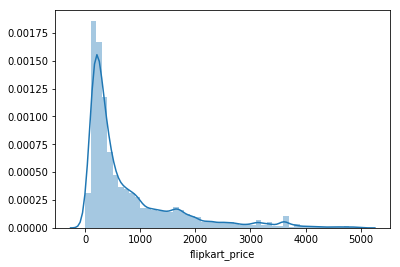

In [33]:
sns.distplot(flipkart[flipkart.flipkart_price<5000].flipkart_price)

In [9]:
flipkart.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Khushwant Singh's,41000864,Book of Unforgettable Women,10,280,4.1
1,Amrita Sharma,43414593,PMR: What Did I Ever See In Him,20,189,2.6
2,John Gray,172235038,MEN ARE FROM MARS- WOMEN ARE FROM VENUS,2581,209,4.4
3,Dange Gouri,175994118,Always a Parent,,188,
4,Gray John,818677548X,Men are from Mars Women are from Venus,325,96,4.3


In [34]:
print("Number of samples on Flipkart: {}".format(flipkart.shape))

flipkart.to_csv('flipkart_f.csv')

Number of samples on Flipkart: (17581, 6)


## Amazon ETL

In [11]:
amazon = pd.read_csv('amazon.csv')

In [12]:
amazon['amazon_isbn-10'].nunique()

12371

In [13]:
amazon.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Teach Your Child to Read in 100 Easy Lessons,by Phyllis Haddox,4.3,14.0,0671631985,₹1
1,The Power of Your Subconscious Mind: Unlock Yo...,by Joseph Murphy,4.5,5009.0,8172345666,₹75
2,Learn to Read Activity Book: 101 Fun Lessons t...,by Hannah Braun - Import,4.8,93.0,1939754526,NaN
3,100 Words Kids Need to Read by 1st Grade,by Terry Cooper,4.6,3.0,0439399297,₹261
4,100 Fun Stories for 4-8 Year Olds (Perfect for...,by Sharlene Alexander,2.9,10.0,B005TA81BG,₹193.52


In [14]:
amazon.drop(amazon[amazon.amazon_price == '819336855X'].index, inplace=True)

In [15]:
def extract_price(price):    
    if price != price:
        return np.nan
    
    if isinstance(price, str):
        
        if price[0] == "₹":
            return price[1:]
        
        lprice = price.split(". ")
        if len(lprice) == 2:
            return lprice[1]

        if price[0].isdigit():
            return price
        else:
            return price[1:]
        
    elif isinstance(price, float):
        return str(price)
    elif isinstance(price, int):
        return str(price)
    else:
        print(price)
        np.nan

In [16]:
price = amazon.amazon_price.apply(extract_price)

In [17]:
amazon['amazon_isbn-10'].nunique()

12370

In [18]:
something = set()
def func(string):
    if string != string:
        return np.nan
        
    if not isinstance(string, float) and '-' in string and not isinstance(string, int) and len(string) > 4:
        return np.nan
    
    if isinstance(string, str):
        if '.' in string and ',' in string:
            string = string.replace(',', '')
            return int(string.split('.')[0])
        elif '.' in string:
            return int(string.split('.')[0])
        elif ',' in string:
            return int(string.replace(',', ''))
        else:
            return int(string)
    else:
        return int(str)

In [19]:
amazon.amazon_price = price.apply(func)

In [20]:
amazon = amazon.drop(amazon[amazon.amazon_price.isna()].index, axis=0)

In [21]:
# Remove the books which are free.

amazon = amazon[amazon.amazon_price > 0]

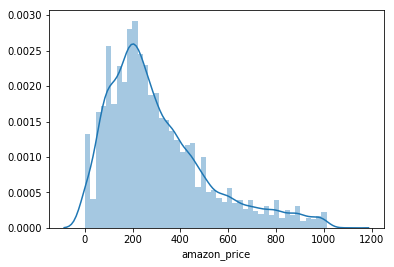

In [28]:
sns.distplot(amazon[amazon.amazon_price<5000].amazon_price)

In [35]:
amazon.to_csv('amazon_f.csv')

# Merge the Dataframes: Amazon and Flipkart

In [29]:
amazon_isbn = list(set(amazon['amazon_isbn-10']))
len(amazon_isbn)

9769

In [30]:
flipkart_isbn = list(set(flipkart.flipkart_isbn10))
len(flipkart_isbn)

13052

In [31]:
len(set(flipkart_isbn).intersection(set(amazon_isbn)))

104